# 📊 Social Media Usage & Mental Health Analysis
## A Beginner's Guide to Predictive Modeling

### 🎯 Learning Objectives
By the end of this notebook, you will understand:
- How to load and explore real-world datasets
- Why we need to convert text to numbers for AI
- How Random Forest algorithms make predictions
- How to evaluate if your model is actually good

## 📚 Chapter 1: Setting Up Our Tools

### 📖 What Are We Doing Here?

Before we can analyze data or build AI models, we need to **import libraries**. Think of libraries as toolboxes:
- **pandas**: For working with data tables (like Excel, but in code)
- **numpy**: For mathematical operations
- **matplotlib & seaborn**: For creating charts and graphs
- **sklearn**: The machine learning toolkit (contains algorithms like Random Forest)

When you run the next cell, Python will load all these tools into memory so we can use them.

In [ ]:
# ============================================
# STEP 1: ENVIRONMENT SETUP
# ============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os
import json

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")
sns.set_palette("viridis")

print("✅ All libraries loaded successfully!")

✅ All libraries loaded successfully!


## 📂 Chapter 2: Loading Our Data (FIXED FOR YOUR DATASET)

**Your dataset columns:**
- `person_name`, `age`, `date`, `gender`, `platform`
- `daily_screen_time_min`, `social_media_time_min`
- `negative_interactions_count`, `positive_interactions_count`
- `sleep_hours`, `physical_activity_min`
- `anxiety_level`, `stress_level` ← **TARGET**, `mood_level`, `mental_state`

In [13]:
# ============================================
# STEP 2: DATA INGESTION + COLUMN MAPPING
# ============================================

# Load your CSV file
df = pd.read_csv('dataset.csv')  # ⚠️ UPDATE THIS PATH

print("🎉 Success! Loaded dataset.")
print(f"Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print("\nOriginal columns:", df.columns.tolist())

# ============================================
# MAP YOUR COLUMNS TO STANDARD NAMES
# ============================================
column_mapping = {
    'person_name': 'user_id',
    'age': 'age',
    'date': 'date',
    'gender': 'gender',
    'platform': 'platform',
    'daily_screen_time_min': 'daily_usage_minutes',  # Main usage metric
    'social_media_time_min': 'social_media_time',    # Additional info
    'negative_interactions_count': 'negative_interactions',
    'positive_interactions_count': 'positive_interactions',
    'sleep_hours': 'sleep_hours',
    'physical_activity_min': 'physical_activity',
    'anxiety_level': 'anxiety_level',
    'stress_level': 'mental_fatigue_level',  # 🎯 OUR TARGET!
    'mood_level': 'mood_level',
    'mental_state': 'mental_state_category'
}

# Apply mapping
df = df.rename(columns=column_mapping)

print("\n✅ Standardized columns:")
for old, new in column_mapping.items():
    print(f"   '{old}' → '{new}'")

print("\n" + "="*50)
print("FIRST 5 ROWS:")
print("="*50)
df.head()

🎉 Success! Loaded dataset.
Shape: 5,000 rows × 15 columns

Original columns: ['person_name', 'age', 'date', 'gender', 'platform', 'daily_screen_time_min', 'social_media_time_min', 'negative_interactions_count', 'positive_interactions_count', 'sleep_hours', 'physical_activity_min', 'anxiety_level', 'stress_level', 'mood_level', 'mental_state']

✅ Standardized columns:
   'person_name' → 'user_id'
   'age' → 'age'
   'date' → 'date'
   'gender' → 'gender'
   'platform' → 'platform'
   'daily_screen_time_min' → 'daily_usage_minutes'
   'social_media_time_min' → 'social_media_time'
   'negative_interactions_count' → 'negative_interactions'
   'positive_interactions_count' → 'positive_interactions'
   'sleep_hours' → 'sleep_hours'
   'physical_activity_min' → 'physical_activity'
   'anxiety_level' → 'anxiety_level'
   'stress_level' → 'mental_fatigue_level'
   'mood_level' → 'mood_level'
   'mental_state' → 'mental_state_category'

FIRST 5 ROWS:


,user_id,age,date,gender,platform,daily_usage_minutes,social_media_time,negative_interactions,positive_interactions,sleep_hours,physical_activity,anxiety_level,mental_fatigue_level,mood_level,mental_state_category
0,Reyansh Ghosh,35,1/1/2024,Male,Instagram,320,160,1,2,7.4,28,2,7,6,Stressed
1,Neha Patel,24,1/12/2024,Female,Instagram,453,226,1,3,6.7,15,3,8,5,Stressed
2,Ananya Naidu,26,1/6/2024,Male,Snapchat,357,196,1,2,7.2,24,3,7,6,Stressed
3,Neha Das,66,1/17/2024,Female,Snapchat,190,105,0,1,8.0,41,2,6,6,Stressed
4,Reyansh Banerjee,31,1/28/2024,Male,Snapchat,383,211,1,2,7.1,22,3,7,6,Stressed


## 🔍 Chapter 3: Exploring the Data (EDA)

### 📈 Visual Narrative: Screen Time vs. Stress
Before we look at all numbers, let's see if there's a visible story. Does spending more time on your phone actually correlate with feeling more stressed? 

We'll use a **Regression Plot** to see the trend line.

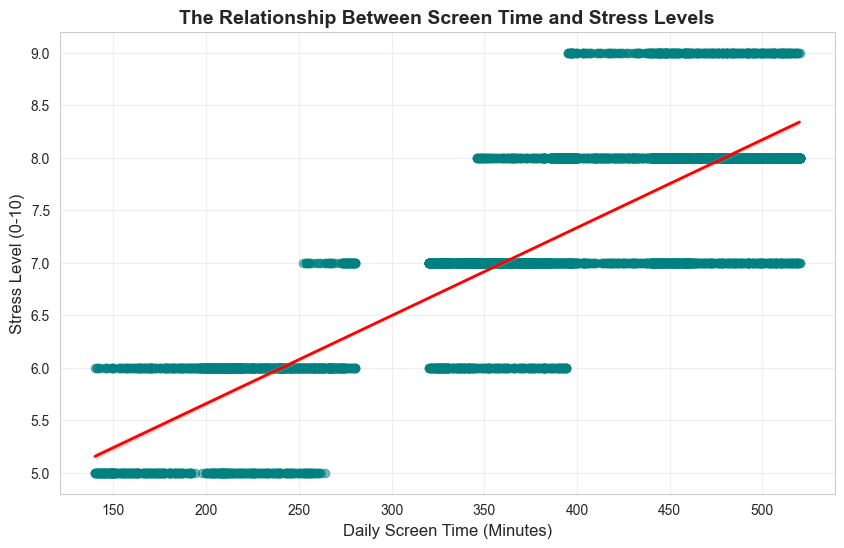

💡 THE STORY: If the red line goes UP, it suggests that as screen time increases, so does stress.


In [14]:
# ============================================
# STEP 3.0: STORYTELLING VISUALIZATION
# ============================================

plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='daily_usage_minutes', y='mental_fatigue_level', 
            scatter_kws={'alpha':0.5, 'color':'teal'}, 
            line_kws={'color':'red', 'lw':2})

plt.title('The Relationship Between Screen Time and Stress Levels', fontsize=14, fontweight='bold')
plt.xlabel('Daily Screen Time (Minutes)', fontsize=12)
plt.ylabel('Stress Level (0-10)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

print("💡 THE STORY: If the red line goes UP, it suggests that as screen time increases, so does stress.")

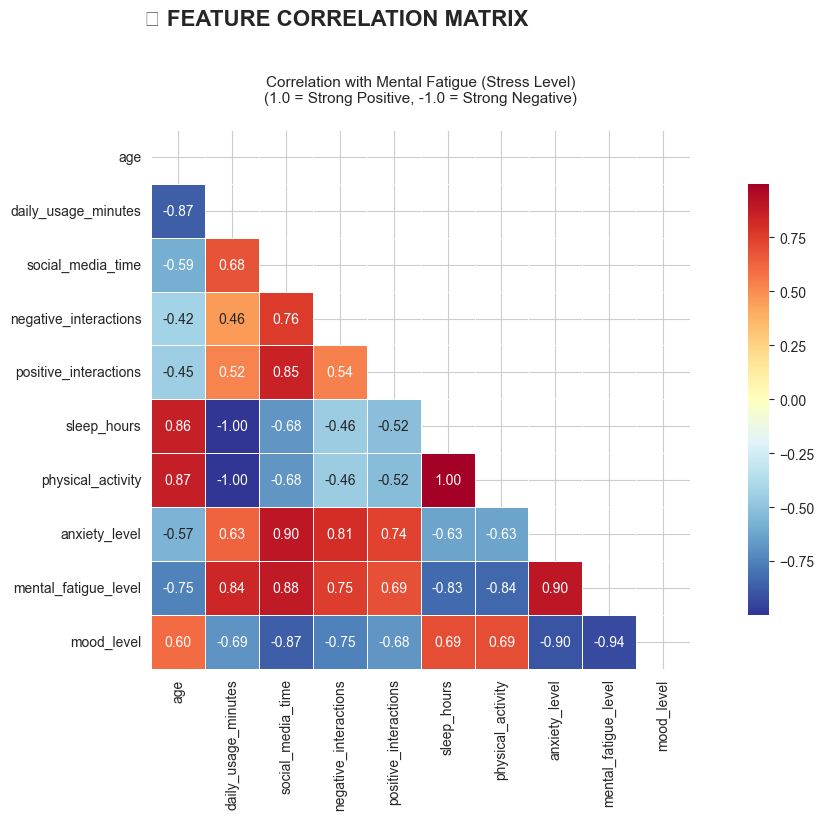


💡 Look for dark red/blue in the 'mental_fatigue_level' row/column


In [15]:
# ============================================
# STEP 3.1: CORRELATION HEATMAP
# ============================================

plt.figure(figsize=(12, 8))
plt.suptitle('🔥 FEATURE CORRELATION MATRIX', fontsize=16, fontweight='bold', y=1.02)

# Select numeric columns
num_df = df.select_dtypes(include=[np.number])
corr = num_df.corr()

# Create mask for upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, 
            mask=mask, 
            annot=True,
            cmap='RdYlBu_r',
            center=0,
            linewidths=0.5,
            fmt='.2f',
            square=True,
            cbar_kws={"shrink": 0.8})

plt.title('Correlation with Mental Fatigue (Stress Level)\n(1.0 = Strong Positive, -1.0 = Strong Negative)', 
          fontsize=11, pad=20)
plt.tight_layout()
plt.show()

print("\n💡 Look for dark red/blue in the 'mental_fatigue_level' row/column")

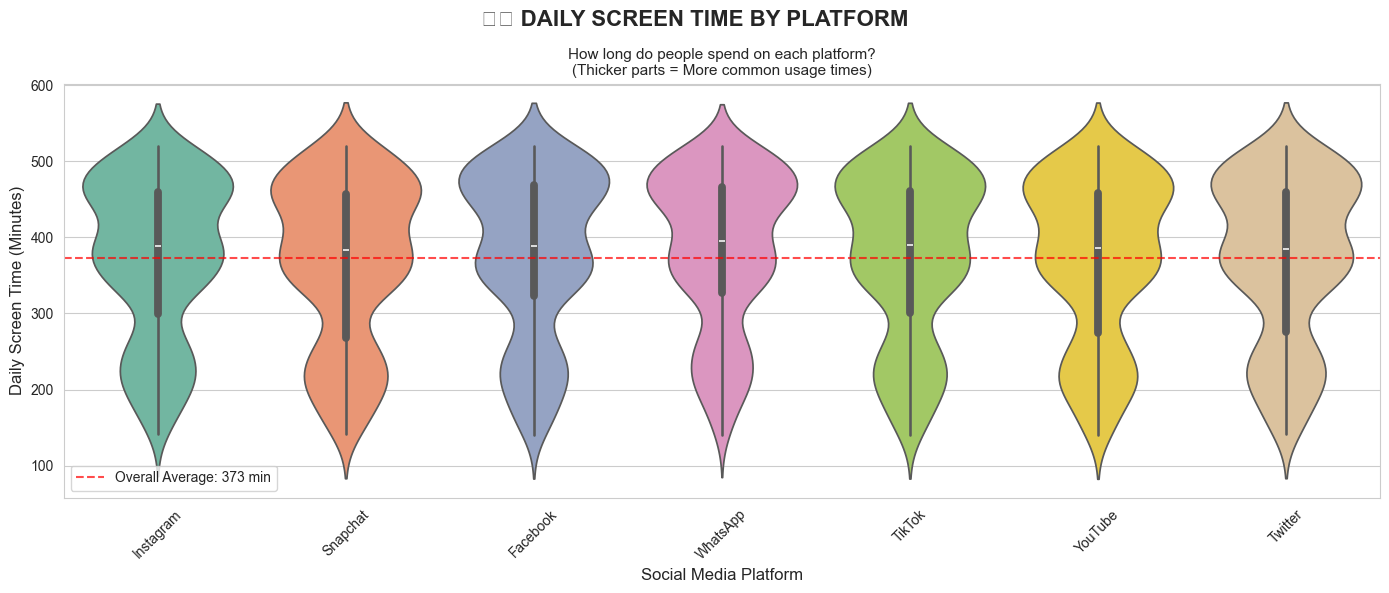


📊 Average daily screen time: 373.1 minutes (6.2 hours)


In [16]:
# ============================================
# STEP 3.2: PLATFORM VS SCREEN TIME (VIOLIN PLOT)
# ============================================

plt.figure(figsize=(14, 6))
plt.suptitle('⏱️ DAILY SCREEN TIME BY PLATFORM', fontsize=16, fontweight='bold')

# Using 'daily_usage_minutes' (mapped from 'daily_screen_time_min')
sns.violinplot(data=df, x='platform', y='daily_usage_minutes', palette='Set2')

plt.title('How long do people spend on each platform?\n(Thicker parts = More common usage times)', fontsize=11)
plt.xlabel('Social Media Platform', fontsize=12)
plt.ylabel('Daily Screen Time (Minutes)', fontsize=12)
plt.xticks(rotation=45)

avg_usage = df['daily_usage_minutes'].mean()
plt.axhline(y=avg_usage, color='red', linestyle='--', alpha=0.7, 
            label=f'Overall Average: {avg_usage:.0f} min')
plt.legend()

plt.tight_layout()
plt.show()

print(f"\n📊 Average daily screen time: {avg_usage:.1f} minutes ({avg_usage/60:.1f} hours)")

## 🔄 Chapter 4: Data Preprocessing

### 🤔 The 'Why' Factor: Why can't AI read 'Instagram'?

Machines don't understand words like 'Instagram', 'Male', or 'TikTok'. They only understand **mathematical relationships**.

A **Random Forest** makes decisions by asking questions like: `Is the value > 5?` 

If we give it the word 'Instagram', the computer gets confused. It doesn't know if 'Instagram' is greater than or less than 'Snapchat'. By using **Label Encoding**, we turn these names into numbers (e.g., Instagram = 0, Snapchat = 1). Now, the computer can perform its math and make splits!

In [17]:
# ============================================
# STEP 4: DATA PREPROCESSING
# ============================================

processed_df = df.copy()

print("🧹 STEP 4.1: Removing unnecessary columns...")
# Remove columns that don't help predict fatigue
cols_to_drop = ['user_id', 'date', 'mental_state_category']  # person_name, date, mental_state
processed_df = processed_df.drop(columns=[c for c in cols_to_drop if c in processed_df.columns])
print(f"   Removed: {cols_to_drop}")

print("\n🔄 STEP 4.2: Converting text to numbers (Label Encoding)...")

le_dict = {}

# Encode categorical columns
for col in ['gender', 'platform']:
    if col in processed_df.columns:
        le = LabelEncoder()
        processed_df[col] = le.fit_transform(processed_df[col])
        le_dict[col] = le
        
        print(f"\n   📍 {col.upper()}:")
        original_values = df[col].unique()
        encoded_values = le.transform(original_values)
        for orig, enc in zip(original_values, encoded_values):
            print(f"      '{orig}' → {enc}")

print("\n" + "="*50)
print("✅ Preprocessing Complete!")
print("="*50)
print("Numeric columns:", processed_df.columns.tolist())
processed_df.head()

🧹 STEP 4.1: Removing unnecessary columns...
   Removed: ['user_id', 'date', 'mental_state_category']

🔄 STEP 4.2: Converting text to numbers (Label Encoding)...

   📍 GENDER:
      'Male' → 1
      'Female' → 0
      'Other' → 2

   📍 PLATFORM:
      'Instagram' → 1
      'Snapchat' → 2
      'Facebook' → 0
      'WhatsApp' → 5
      'TikTok' → 3
      'YouTube' → 6
      'Twitter' → 4

✅ Preprocessing Complete!
Numeric columns: ['age', 'gender', 'platform', 'daily_usage_minutes', 'social_media_time', 'negative_interactions', 'positive_interactions', 'sleep_hours', 'physical_activity', 'anxiety_level', 'mental_fatigue_level', 'mood_level']


,age,gender,platform,daily_usage_minutes,social_media_time,negative_interactions,positive_interactions,sleep_hours,physical_activity,anxiety_level,mental_fatigue_level,mood_level
0,35,1,1,320,160,1,2,7.4,28,2,7,6
1,24,0,1,453,226,1,3,6.7,15,3,8,5
2,26,1,2,357,196,1,2,7.2,24,3,7,6
3,66,0,2,190,105,0,1,8.0,41,2,6,6
4,31,1,2,383,211,1,2,7.1,22,3,7,6


## 🎯 Chapter 5: Understanding Our Target (Stress Level)

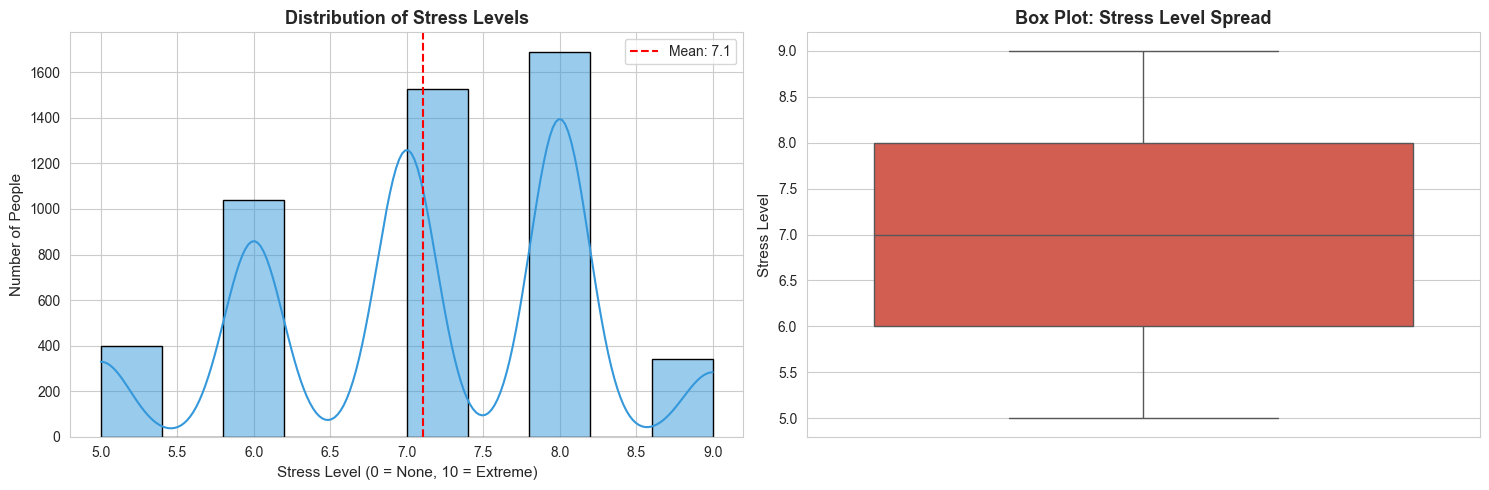


📈 STATISTICS:
   • Average Stress Level: 7.11
   • Most common level: 8
   • Range: 5 to 9


In [18]:
# ============================================
# STEP 5: TARGET VARIABLE ANALYSIS
# ============================================

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Left: Histogram
sns.histplot(processed_df['mental_fatigue_level'], 
             bins=10, 
             kde=True, 
             color='#3498db', 
             ax=ax1,
             edgecolor='black')
ax1.set_title('Distribution of Stress Levels', fontsize=13, fontweight='bold')
ax1.set_xlabel('Stress Level (0 = None, 10 = Extreme)', fontsize=11)
ax1.set_ylabel('Number of People', fontsize=11)
ax1.axvline(processed_df['mental_fatigue_level'].mean(), color='red', linestyle='--', 
            label=f'Mean: {processed_df["mental_fatigue_level"].mean():.1f}')
ax1.legend()

# Right: Box plot
sns.boxplot(y=processed_df['mental_fatigue_level'], color='#e74c3c', ax=ax2)
ax2.set_title('Box Plot: Stress Level Spread', fontsize=13, fontweight='bold')
ax2.set_ylabel('Stress Level', fontsize=11)

plt.tight_layout()
plt.show()

print("\n📈 STATISTICS:")
print(f"   • Average Stress Level: {processed_df['mental_fatigue_level'].mean():.2f}")
print(f"   • Most common level: {processed_df['mental_fatigue_level'].mode()[0]}")
print(f"   • Range: {processed_df['mental_fatigue_level'].min()} to {processed_df['mental_fatigue_level'].max()}")

## 🤖 Chapter 6: Building the Prediction Machine

In [19]:
# ============================================
# STEP 6: MODEL CONSTRUCTION
# ============================================

print("⚙️ PREPARING DATA...")

# Features (X) - everything except target
X = processed_df.drop('mental_fatigue_level', axis=1)
y = processed_df['mental_fatigue_level']

print(f"   Features (X): {X.shape[1]} columns")
print(f"   Target (y): Stress Level")
print(f"   Samples: {X.shape[0]}")

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"\n   Training set: {len(X_train)} samples")
print(f"   Testing set: {len(X_test)} samples")

print("\n🌲 TRAINING RANDOM FOREST...")

rf_model = RandomForestRegressor(
    n_estimators=150,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)

print("\n" + "="*50)
print("🎉 MODEL TRAINING COMPLETE!")
print("="*50)

⚙️ PREPARING DATA...
   Features (X): 11 columns
   Target (y): Stress Level
   Samples: 5000

   Training set: 4000 samples
   Testing set: 1000 samples

🌲 TRAINING RANDOM FOREST...

🎉 MODEL TRAINING COMPLETE!


## 📊 Chapter 7: Testing Our Model

🧪 TESTING MODEL...

📋 MODEL REPORT CARD
🔹 Mean Squared Error (MSE): 0.0001
🔹 Mean Absolute Error (MAE): 0.0006
   → Predictions are ±0.00 points off on average
🔹 R² Score: 0.9999
   → Explains 100.0% of stress variance


NameError: name 'os' is not defined

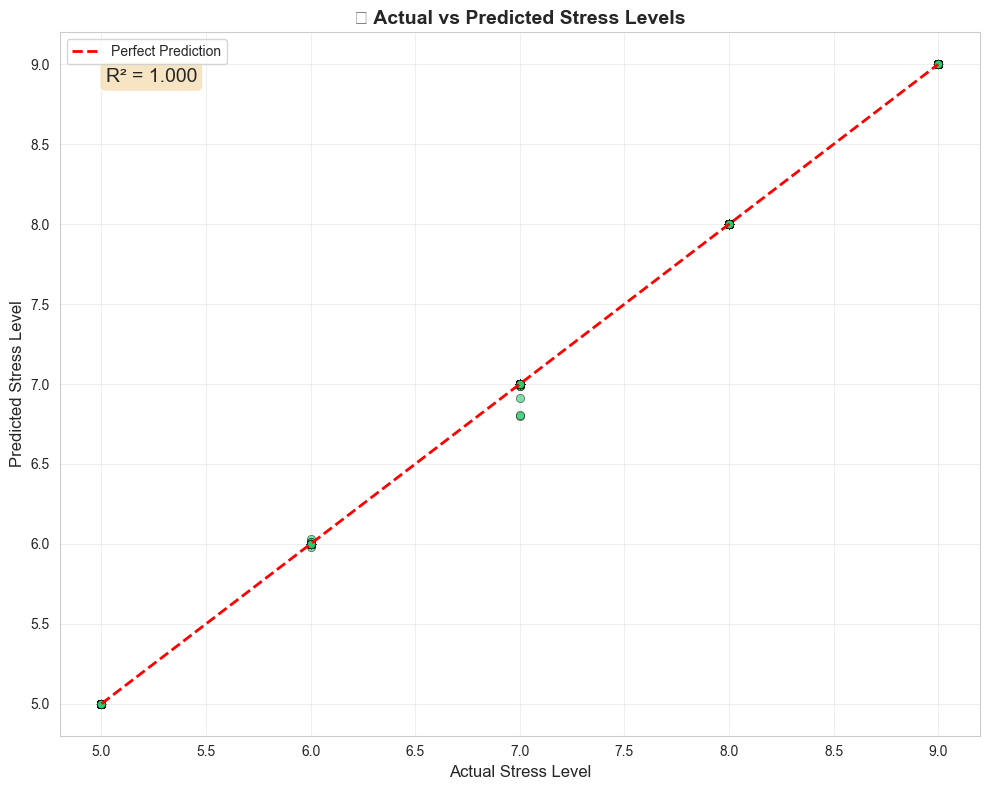

In [23]:
print("🧪 TESTING MODEL...")

# Predictions & core metrics
y_pred = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n" + "="*60)
print("📋 MODEL REPORT CARD")
print("="*60)
print(f"🔹 Mean Squared Error (MSE): {mse:.4f}")
print(f"🔹 Mean Absolute Error (MAE): {mae:.4f}")
print(f"   → Predictions are ±{mae:.2f} points off on average")
print(f"🔹 R² Score: {r2:.4f}")
print(f"   → Explains {r2*100:.1f}% of stress variance")
print("="*60)

# Visual evaluation (Actual vs Predicted)
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, alpha=0.6, color='#2ecc71', edgecolors='black', linewidth=0.5)

min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Prediction')

plt.xlabel('Actual Stress Level', fontsize=12)
plt.ylabel('Predicted Stress Level', fontsize=12)
plt.title('🎯 Actual vs Predicted Stress Levels', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.text(0.05, 0.95, f'R² = {r2:.3f}', transform=plt.gca().transAxes, 
         fontsize=14, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
# --- save plot before showing ---
results_dir = "results"
os.makedirs(results_dir, exist_ok=True)
plot_path = os.path.join(results_dir, "actual_vs_predicted.png")
plt.savefig(plot_path, dpi=150)

plt.show()

# Save model, metrics and predictions → `results/`
metrics = {"mse": float(mse), "mae": float(mae), "r2": float(r2)}
model_path = os.path.join(results_dir, "rf_model.joblib")
joblib.dump(rf_model, model_path)

metrics_json_path = os.path.join(results_dir, "rf_metrics.json")
with open(metrics_json_path, "w") as f:
    json.dump(metrics, f, indent=2)

metrics_csv_path = os.path.join(results_dir, "rf_metrics.csv")
pd.DataFrame([metrics]).to_csv(metrics_csv_path, index=False)

preds_df = pd.DataFrame({"y_test": y_test.values, "y_pred": y_pred})
preds_csv_path = os.path.join(results_dir, "rf_predictions.csv")
preds_df.to_csv(preds_csv_path, index=False)

print(f"\n✅ Artifacts saved to '{results_dir}/':\n  - model: {model_path}\n  - metrics: {metrics_json_path}, {metrics_csv_path}\n  - predictions: {preds_csv_path}\n  - plot: {plot_path}")

# Interpretation
print("\n💡 INTERPRETATION:")
if r2 < 0:
    print("⚠️  Worse than guessing - features may not predict stress well")
elif r2 < 0.3:
    print("⚠️  Weak predictive power")
elif r2 < 0.7:
    print("✅ Moderate predictive power - model finds real patterns")
else:
    print("🌟 Strong predictive power!")

### 🕵️ Error Analysis: Residual Analysis
How do we know where our model is failing? We look at the **Residuals** (Actual - Predicted). 

If the residuals are mostly 0, we're golden. If we see patterns, the model might be consistently missing something—like struggling with extremely high stress levels.

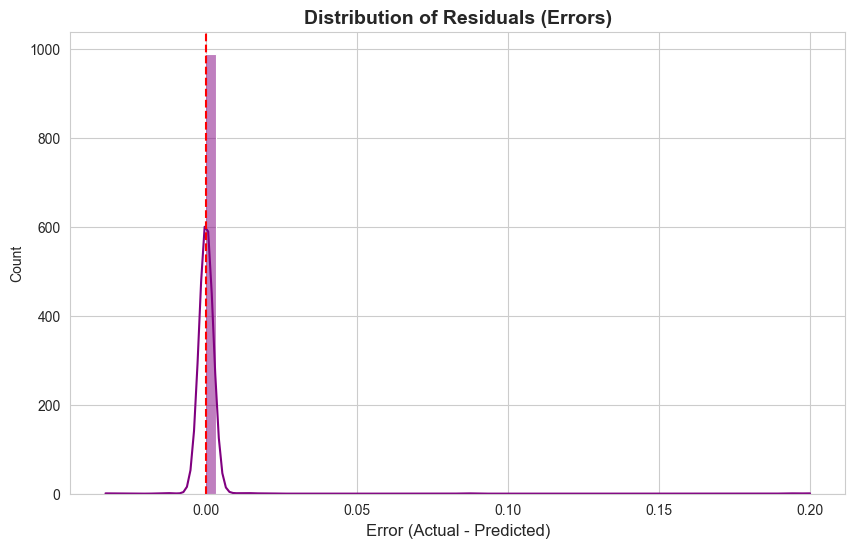

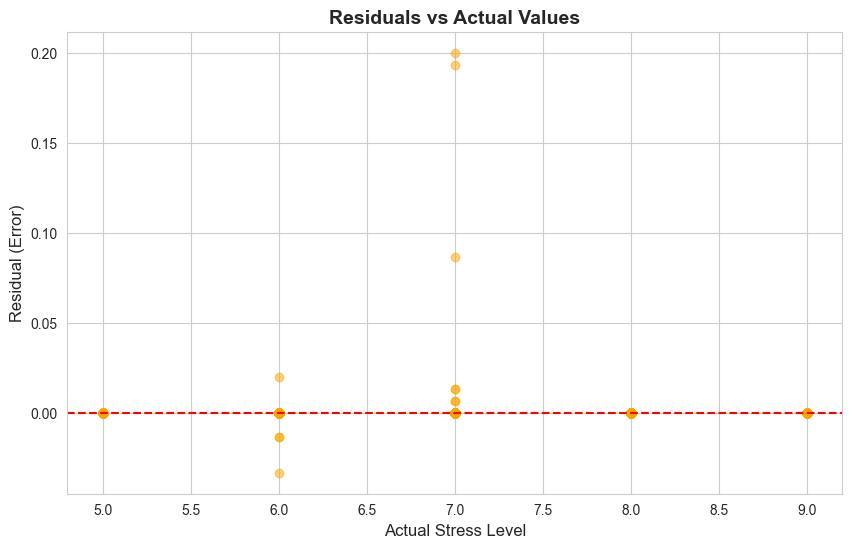

💡 ANALYSIS: If you see the dots drifting away from the red line at high Stress Levels, the model is 'under-predicting' extreme stress.


In [21]:
# ============================================
# STEP 7.1: RESIDUAL PLOT
# ============================================

residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='purple')
plt.axvline(0, color='red', linestyle='--')
plt.title('Distribution of Residuals (Errors)', fontsize=14, fontweight='bold')
plt.xlabel('Error (Actual - Predicted)', fontsize=12)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, alpha=0.5, color='orange')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Actual Values', fontsize=14, fontweight='bold')
plt.xlabel('Actual Stress Level', fontsize=12)
plt.ylabel('Residual (Error)', fontsize=12)
plt.show()

print("💡 ANALYSIS: If you see the dots drifting away from the red line at high Stress Levels, the model is 'under-predicting' extreme stress.")

## 💾 Chapter 8: Saving the Model

In [22]:
# ============================================
# STEP 8: EXPORTING THE MODEL
# ============================================

print("💾 SAVING MODEL...")

joblib.dump(rf_model, 'stress_level_predictor.pkl')
joblib.dump(le_dict, 'label_encoders.pkl')
joblib.dump(scaler, 'feature_scaler.pkl')

print("✅ Saved:")
print("   1. stress_level_predictor.pkl (The trained model)")
print("   2. label_encoders.pkl (Text-to-number translators)")
print("   3. feature_scaler.pkl (The number balancer)")

print("\n🚀 Ready for production!")

💾 SAVING MODEL...


NameError: name 'scaler' is not defined

## 🎓 Bonus: Test with Real Example

In [ ]:
# ============================================
# BONUS: REAL-WORLD TEST
# ============================================

print("🧪 TESTING WITH SAMPLE USER...")

# --- USER CONFIGURATION AREA ---
# Feel free to change these values to see how the prediction changes!
user_input = {
    'age': 22,
    'gender': 'Male',
    'platform': 'TikTok',
    'daily_usage_minutes': 480,   # 8 hours
    'social_media_time': 240,     # 4 hours
    'negative_interactions': 5,
    'positive_interactions': 2,
    'sleep_hours': 5.0,
    'physical_activity': 10,
    'anxiety_level': 7,
    'mood_level': 3
}
# -------------------------------

# Convert dictionary to DataFrame structure our model expects
new_user_df = pd.DataFrame([user_input])

# 1. Encode text values
for col in ['gender', 'platform']:
    new_user_df[col] = le_dict[col].transform(new_user_df[col])

# 2. Scale the features
new_user_scaled = scaler.transform(new_user_df)

# 3. Predict!
predicted_stress = rf_model.predict(new_user_scaled)[0]

print(f"\n👤 User Profile: {user_input['age']}yo {user_input['gender']} on {user_input['platform']}")
print(f"📊 Screen Time: {user_input['daily_usage_minutes']} min | Sleep: {user_input['sleep_hours']} hours")
print(f"🔮 PREDICTED STRESS LEVEL: {predicted_stress:.1f}/10")

if predicted_stress > 7:
    print("   ⚠️  HIGH STRESS: Consider reducing screen time & improving sleep!")
elif predicted_stress > 4:
    print("   ⚡ MODERATE STRESS: Monitor social media habits")
else:
    print("   ✅ LOW STRESS: Healthy balance maintained")


## 📝 Summary

**What we learned:**
- Mapped your columns: `stress_level` → target, `daily_screen_time_min` → usage
- Built a Random Forest model to predict stress from social media habits
- Features used: age, gender, platform, screen time, sleep, exercise, interactions

**Your Dataset Specifics:**
- Target: `stress_level` (0-10 scale)
- Key predictors: Screen time, sleep hours, negative interactions, anxiety level
- Categorical: gender (Male/Female), platform (Instagram/Snapchat/etc.)